In [54]:
1 + 1 + 5

7

In [55]:
5 * 6 /5

6.0

In [56]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [57]:
hai = ['a', 'b', 'c']
print(hai)

['a', 'b', 'c']


In [58]:
def test(x):
    last_list = []
    for i in range(5):
        list = [x+i, x+i+1, x+i+2, x+i+3]
        last_list += list
    return last_list

In [59]:
test(1)

[1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6, 4, 5, 6, 7, 5, 6, 7, 8]

In [61]:
import re

k = "あまおと"
if re.match(u'[ぁ-ん]+', k):
    print("kはひらがなです。")
elif re.match(u'[ァ-ン]+', k):
    print("kはカタカナです。")
elif re.match(u'[\u4e00-\u9FFF]+',k):
    print("kは漢字です。")
elif re.match(u'[0-9]+',k):
    print("kは数字です。")
else:
    print("これは何でしょう？")

kはひらがなです。


In [62]:
dict1 = {'Kim':26}
print(dict1['Kim'])

26


In [63]:
print(dict1[26])

KeyError: 26

In [64]:
dict2 = {'Kim':26, 'Bob':32}
for key, value in dict2.items():
    if value == 32:
        print(key)

Bob


# NLTKコーパスのインポート

In [65]:
import nltk

from nltk.book import *

Gutenbergコーパスのインポート、フィールド（文書）ごとに表示

In [66]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


条件付き頻度分布の作成

In [67]:
Fdist = FreqDist(gutenberg.words('austen-emma.txt'))
Fdist.most_common(10)

[(',', 11454),
 ('.', 6928),
 ('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381)]

brownコーパスのインポート、カテゴリ別に表示

In [68]:
from nltk.corpus import brown
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


条件付き頻度分布の作成

In [69]:
Cfdist = nltk.ConditionalFreqDist((ctgr, word) for ctgr in brown.categories()
                                  for word in brown.words(categories = ctgr))

ジャンルごとの助動詞の頻出度を表化。

In [70]:
comparison = ['can', 'could', 'may', 'must', 'should', 'will', 'would']
Cfdist.tabulate(samples=comparison,conditions=brown.categories())

                   can  could    may   must should   will  would 
      adventure     46    151      5     27     15     50    191 
 belles_lettres    246    213    207    170    102    236    392 
      editorial    121     56     74     53     88    233    180 
        fiction     37    166      8     55     35     52    287 
     government    117     38    153    102    112    244    120 
        hobbies    268     58    131     83     73    264     78 
          humor     16     30      8      9      7     13     56 
        learned    365    159    324    202    171    340    319 
           lore    170    141    165     96     76    175    186 
        mystery     42    141     13     30     29     20    186 
           news     93     86     66     50     59    389    244 
       religion     82     59     78     54     45     71     68 
        reviews     45     40     45     19     18     58     47 
        romance     74    193     11     45     32     43    244 
science_fi

例えば、adventureやfiction（小説）には、couldやwouldといった表現が多く使われており、
editorial（教育）やhobbiesには、canやwillといった表現が多く使われている。

名前に対してタグ付けされた性別の情報から

In [71]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist((sex, name[-1]) for sex in names.fileids()
                              for name in names.words(sex))

In [72]:
comparison = ['a', 'e', 'i', 'o', 'u']
cfd.tabulate(samples=comparison,conditions=names.fileids())

              a    e    i    o    u 
female.txt 1773 1432  317   33    6 
  male.txt   29  468   50  165   12 


女性には、語尾にaやeの母音が含まれている場合が多く、
男性には、語尾にeやoの母音が含まれていることが多いといったことが分かる。
更に、これを図で表すと下記のようになる。

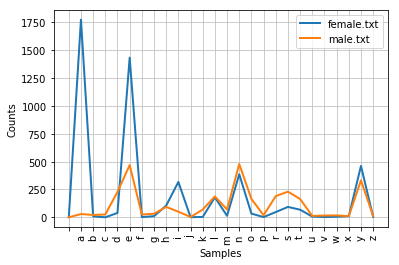

In [73]:
%matplotlib inline

cfd.plot()

品詞タグ付け
ブラウンコーパスのカテゴリ「小説」の単語について、頻出上位100単語にタグ付けされた品詞の情報を基に
全体の単語の品詞タグを予測し、その精度を出力する。

In [74]:
fd = nltk.FreqDist(brown.words(categories = 'fiction'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories = 'fiction'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word, cfd[word].max()) for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown.tagged_sents(categories = 'fiction'))

0.39831795351010396

今度は、品詞タグ付け単語全てを読み込み、
次に、タグがない状態で再学習する。

In [75]:
unigram_tagger = nltk.UnigramTagger(brown.tagged_sents(categories = 'fiction'))
unigram_tagger.tag(brown.sents(categories = 'fiction')[2008])

[('``', '``'),
 ('All', 'ABN'),
 ('because', 'CS'),
 ('I', 'PPSS'),
 ("didn't", 'DOD*'),
 ('feel', 'VB'),
 ('like', 'CS'),
 ('dancing', 'VBG'),
 ("''", "''"),
 ('.', '.')]

検証用、テスト用に分割して再試行（今度は精度の出力）

In [76]:
brown_tagged_sents = brown.tagged_sents(categories='fiction')

size = int(len(brown_tagged_sents)*0.9)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.824455652601796

前の単語も読み取って試行

In [77]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)

0.16742526756058557

前の単語も読み取ることで、特異性が高まり、未知のデータに対応しづらくなってしまった。その結果、予測精度が下がった。
そこで、もし、前の単語まで見たセットが対応していない場合は、その単語単体で検索するという段階を踏むことで、精度を高める。

In [78]:
t1 = nltk.UnigramTagger(train_sents)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8393406323040964

# 機械学習による分類方法

まず、単語とその単語の品詞タグの情報をセットで持たせる。そのセットを検証用と学習用で分割する。

In [79]:
brown_tagged_words = brown.tagged_words(categories='fiction')

feature_sets = [({'word': w}, t) for w, t in brown_tagged_words]

train_words = feature_sets[:size]
test_words = feature_sets[size:]

機械学習①　決定木

In [80]:
Decision_Tree = nltk.DecisionTreeClassifier.train(train_words)
nltk.classify.accuracy(Decision_Tree,test_words)

0.6601509340591365

機械学習②　単純ベイズ

In [ ]:
NaiveBayes = nltk.NaiveBayesClassifier.train(train_words)
nltk.classify.accuracy(NaiveBayes,test_words)

機械学習③　最大エントロピー
まずランダムで入力値に対する特徴量・ラベルを設定し、最適なものに該当するまで繰り返し洗練させてゆくイメージ その為、訓練セットやラベルの数、特徴量の数によって処理時間が変わる

In [ ]:
Maxent = nltk.MaxentClassifier.train(train_words,max_iter=30)
nltk.classify.accuracy(Maxent,test_words)

# タグ付けされた情報を基に、文章の「句」構造を作成

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

cp = nltk.RegexpParser(grammar)
result = cp.parse(brown_tagged_sents[15])

In [ ]:
print(result)

句構造格納テキストを用いて、作成された句構造が妥当であるかの確認

In [ ]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser(r"NP: {<DT>?<JJ>*<NN>}")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))

IOB Accuracy:  文の先頭、それに続く単語、句構造の外にある単語に分割することが出来る。
Precision:     精度、
Recall:        再現率、
F-Measure:     F値

単語ごとに割り振られたタグを、句構造に分類するための学習器

In [ ]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t, c) for w, t, c in nltk.chunk.tree2conlltags(sent)]
                     for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data)
    
    def parse(self, sentence):
        pos_tags = [pos for (word, pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word, pos), chunktag) in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

検証用とテスト用に分けて実装

In [ ]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types = ['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types = ['NP'])

unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

高い精度が出ていることが確認できる

今度は、機械学習（最大エントロピー）を利用した学習器を作成する。

In [ ]:
class MaxentTagger(nltk.TaggerI):
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i)
                train_set.append((featureset, tag))
        self.classifier = nltk.MaxentClassifier.train(train_set, max_iter=5)
            
    def tag(self, sentence):
        tag = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i)
            tag.append(self.classifier.classify(featureset))     
        return zip(sentence, tag)

In [ ]:
class MaxentChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = [[((w, t), c) for (w, t, c) in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = MaxentTagger(tagged_sents)
        
    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t), c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

参考までに、文脈の連続性を加味しながら学習をする分類器

In [ ]:
 class ConsecutiveNPChunkTagger(nltk.TaggerI):
    
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append((featureset, tag))
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train(train_set, max_iter=1)
            
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
            
        return zip(sentence, history)

In [ ]:
class ConsecutiveNPChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        tagged_sents = [[((w, t), c) for (w, t, c) in nltk.chunk.tree2conlltags(sent)] for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)
        
    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t), c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

# 実行

In [ ]:
def npchunk_features(sentence, i):
    word,tag = sentence[i]
    return {'tag':tag}

chunker = MaxentChunker(train_sents)
print(chunker.evaluate(test_sents))

高い精度が出ていることが分かる。

# さらに、句構造を文構造まで広げる

In [ ]:
from nltk import CFG

groucho_grammar = CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

parser = nltk.ChartParser(groucho_grammar)
trees = parser.parse(sent)

for tree in trees:
    print(tree)

構文解析器（再帰下降構文）

In [ ]:
nltk.app.rdparser()

より完全で効率的な構文解析（適格部分文字列表）

In [ ]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs = tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span):
            end = start+span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                             (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst

def display(wfst, tokens):
    print('\nWFST' + ' '.join([("%-4d" % i) for i in range(1,len(wfst))]))
    for i in range(len(wfst)-1):
        print ("%d" % i,end = "")
        for j in range(1,len(wfst)):
            print ("%-4s" % (wfst[i][j] or '.'),end = "")
        print("\n")

In [ ]:
tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)

In [ ]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar)
display(wfst1, tokens)

In [ ]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar, trace=True)

# 一階述語論理における量化子表現

In [ ]:
v = """
bruce => b
cyril => c
elspeth => e
julia => j
matthew => m
person => {b, e, j, m}
admire => {(j, b), (b, b), (m, e), (e, m), (c, a)}
"""
val = nltk.Valuation.fromstring(v)

誰かに尊敬される人を挙げる

In [ ]:
lp = nltk.Expression()
dom = val.domain
m = nltk.Model(dom, val)
g = nltk.Assignment(dom)
fmla = lp.fromstring('(person(x) -> exists y.(person(y) & admire(x, y)))')
m.satisfiers(fmla, 'x', g)

誰からも尊敬される人を挙げる

In [ ]:
fmla2 = lp.fromstring('(person(y) & all x.(person(x) & admire(x, y)))')
m.satisfiers(fmla2, 'y', g)

ここで出てくるall x.やexists y.のような束縛演算子を、λによって表すこともできる。

In [ ]:
lp = nltk.Expression()
e = lp.fromstring(r'\x.(walk(x) & chew_gum(x))')
e

In [ ]:
e = lp.fromstring(r'\x.(walk(x) & chew_gum(x))(gerald)')

In [ ]:
print(e)

また、簡約化が可能

In [ ]:
print(e.simplify())

文を一階述語論理に変換

In [ ]:
from nltk import load_parser
parser = load_parser('grammars/book_grammars/simple-sem.fcfg', trace = 0)
sentence = 'Angus gives a bone to every dog'
trees = next(parser.parse(sentence.split()))
print(trees.label()['SEM'])

# 日本語コーパスを使用した自然言語処理

In [ ]:
from chasen import *
jeita = ChasenCorpusReader(r'C:\Users\funyu\OneDrive\Anaconda3\Lib\site-packages\nltk\jeita', '.*chasen', encoding = 'utf-8')

In [ ]:
jeita_name = [f[0] for f in jeita.tagged_words() if re.match( r'名詞-固有名詞-人名.*',f[1].split('\t')[2])]

jeita.tagged_words()[0:1000]

jeitaコーパスの保存

In [81]:
import pickle
f = open('jeita.txt', 'wb')
pickle.dump(jeita, f)

保存してあるjeitaコーパスのロード

In [82]:
import pickle
f = open("jeita.txt","rb")
jeita = pickle.load(f)

In [83]:
hira = []
kana = []
kanji = []

for i in jeita.words():
    if re.match(u'[ぁ-ん]+', i):
        hira.append(i)
    elif re.match(u'[ァ-ン]+', i):
        kana.append(i)
    elif re.match(u'[\u4e00-\u9FFF]+',i):
        kanji.append(i)

KeyboardInterrupt: 

In [ ]:
fdist_hira = FreqDist(hira)
fdist_kana = FreqDist(kana)
fdist_kanji = FreqDist(kanji)
fdist_name = FreqDist(jeita_name)

FreqDistの保存

In [ ]:
import pickle
f1 = open('fdist_hira.txt', 'wb')
pickle.dump(fdist_hira, f1)
f2 = open('fdist_kana.txt', 'wb')
pickle.dump(fdist_kana, f2)
f3 = open('fdist_kanji.txt', 'wb')
pickle.dump(fdist_kanji, f3)
f4 = open('fdist_name.txt', 'wb')
pickle.dump(fdist_name, f4)

保存してあるFreqDistのロード

In [84]:
import pickle
f1 = open("fdist_hira.txt","rb")
fdist_hira = pickle.load(f1)
f2 = open("fdist_kana.txt","rb")
fdist_kana = pickle.load(f2)
f3 = open("fdist_kanji.txt","rb")
fdist_kanji = pickle.load(f3)
f4 = open("fdist_name.txt","rb")
fdist_name = pickle.load(f4)

In [85]:
print(fdist_hira.keys()) #出現単語（ひらがな）の中身

dict_keys(['の', 'を', 'と', 'から', 'まけ', 'れ', 'た', 'に', 'は', 'ぞ', 'ろ', 'へ', 'て', 'あと', 'い', 'すぐ', 'な', 'が', 'ある', 'か', 'つて', 'ぶら', 'る', 'し', 'どちら', 'お', 'です', 'で', 'あつ', 'だ', 'といふ', 'こと', 'ない', 'ね', 'ば', 'なら', 'ぬ', 'いふ', 'うし', 'ます', 'も', 'あり', 'やう', 'ませ', 'ん', 'とい', 'つた', 'はず', 'にぶ', 'ら', 'つ', 'もの', 'ぢ', 'や', 'いつ', 'たら', 'へえ', 'ご', 'ざり', 'がい', 'として', 'ずる', 'かける', 'しま', 'ながら', 'あ', 'まだ', 'つたの', 'あれ', 'こ', 'ござい', 'これ', 'り', 'どうしても', 'たい', 'ゆるやか', 'ゆら', 'いつも', 'つい', 'う', 'どう', 'しよ', 'あなた', 'さあ', 'よい', 'こんな', 'ひどい', 'ので', 'とう', 'さ', 'しら', 'さい', 'かう', 'つまら', 'ばかり', 'く', 'する', 'めぐらし', 'しばかり', 'あたり', 'うに', 'ぎ', 'せ', 'たる', 'もと', 'ひらい', 'うて', 'ほのか', 'はれ', 'ぽ', 'ちり', 'でも', 'つく', 'まで', 'れる', 'こんなに', 'なかつ', 'さし', 'ふと', 'くれ', 'うち', 'さき', 'ぼんやり', 'だけ', 'はつ', 'きり', 'より', 'あい', 'きが', 'なつ', 'しかと', 'なる', 'づ', 'め', 'ふ', 'ひ', 'ど', 'すべて', 'よれ', 'なけれ', 'かし', 'ため', 'へる', 'それ', 'まどろむ', 'なし', 'かぎり', 'なれ', 'えつ', 'かも', 'べき', 'しらが', 'ずん', 'あらう', 'なつかしい', 'ち', 'き', 'なく', 'あの', 'もつ', 'だら', 'やつ', 'ぱ', 'ま', 'ぐる', 'つと', 

In [86]:
print(fdist_kana.keys())　#出現単語（カタカナ）の中身

SyntaxError: invalid character in identifier (<ipython-input-86-6383a76e7668>, line 1)

In [87]:
fdist_hira.most_common(10)

[('の', 168571),
 ('に', 112198),
 ('は', 102060),
 ('を', 94528),
 ('て', 88552),
 ('た', 86490),
 ('が', 67138),
 ('と', 58405),
 ('で', 56713),
 ('し', 35191)]

In [ ]:
fdist_kana.most_common(10)

In [ ]:
fdist_kanji.most_common(10)

In [88]:
fdist_name.most_common(10)

[('つた', 3912),
 ('蘭軒', 1284),
 ('津田', 961),
 ('柏軒', 499),
 ('つたの', 495),
 ('小林', 394),
 ('伊沢', 381),
 ('守', 376),
 ('明', 351),
 ('照', 339)]

In [ ]:
print(' '.join(set(w for w,t in jeita.tagged_words() if t.split('\t')[0] == u"フジ")))

In [ ]:
print(' '.join(set(w for w,t in jeita.tagged_words() if t.split('\t')[0] == u"コウドウ")))

隣り合う2語について、品詞の組み合わせから、どのような表現があるかを調査

In [91]:
jeita_tagged_bigrams = bigrams(jeita.tagged_words()[0:10000])

In [90]:
for hu in jeita_tagged_bigrams:
    if hu[0][1].split('\t')[2].split('-')[0] == '副詞' and hu[1][1].split('\t')[2].split('-')[0] == '形容詞':
        print(hu[0][0],hu[1][0])

極めて 美しい
依然として 白く
いつも ボロ
案外 弱い
あまり 白く
最も 早い
あまり 仰々し


In [92]:
for hui in jeita_tagged_bigrams:
    if hui[0][1].split('\t')[2].split('-')[0] == '副詞' and hui[1][1].split('\t')[2].split('-')[0] == '動詞':
        print(hui[0][0],hui[1][0])

呆然と し
斯く し
どう しよ
丁度 建て
嘗て 聞く
後に し
つと 見廻し
たとい ひ
まだ 散る
まだ とる
よく 似
もはや し
一寸 出
一寸 出
少し 話さ
さ つ
うかと 思ふ
また さしくる
まだ 散り
ガリガリ やっ
やっと 諦め
あんなに 威張っ
どうしても 笑わ
ガリガリ やっ
ぴんと 張っ
何とか 言い
そう 考え
何一つ する
おどおど する
どっと 笑い
初めて 見る
そう いわ
どうせ 負ける
思わず 聞き返し
全く 考え
どう 見
くどくど 聞き返し
そう し
どうか し
そう する
何故 こん
もう少し 話し
もう一度 行く
こう 云っ
直ぐに 現れ
沢山 あっ
大抵 忘れ
まだ 張り
一度に 笑っ
げに 見下し
あわや 殴ら
どう し
常に 身構え
